<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

## 04 - Exploratory Data Analysis EDA - Parte II

### Tratamiento de valores atípicos
#### Técnicas de imputación

 
    
><figure><center>
  <img src="https://miro.medium.com/max/1400/1*pafL_EAwJKtfUFgQpFYllg.png" alt="EDA" width=800 height=800/>
  <a href="https://medium.com/data-cleaning-dealing-with-outliers-using-data/data-cleaning-dealing-with-outliers-using-data-imputation-techniques-f2821ace2e8d">Source</a>
</figure><center> 

Para realizar el proceso de EDA usamos: 

+ Sweetviz
+ pandas profiling
+ dataprep
+ Dtale
+ Autoviz

## Ejemplo: Titanic Dataset

In [33]:
#De la sesión anterior
import pandas as pd
import seaborn as sns
df = sns.load_dataset('titanic')

In [34]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [55]:
df.shape[0] - df.count()

alive            0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [36]:
df.replace({False: 0, True: 1}, inplace=True)

In [37]:
df['adult_male'] = df['adult_male'].map({1: 'adult_male', 0: 'non-adult_male'})
df['alone'] = df['alone'].map({1: 'alone', 0: 'non-alone'})

In [38]:
df.loc[:, df.dtypes == 'object'] = \
    df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [39]:
df = df.drop(columns=['survived', 'pclass', 'embarked'], errors='ignore')
#
df_one = pd.get_dummies(df["alive"], drop_first=True)
df_two = pd.concat((df_one, df), axis=1)
df_two = df_two.drop(["alive"], axis=1)
#
df = df_two.rename(columns={"yes": "alive"})
df.head()

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,adult_male,NaN,Southampton,non-alone
1,1,female,38.0,1,0,71.2833,First,woman,non-adult_male,C,Cherbourg,non-alone
2,1,female,26.0,0,0,7.9250,Third,woman,non-adult_male,NaN,Southampton,alone
3,1,female,35.0,1,0,53.1000,First,woman,non-adult_male,C,Southampton,non-alone
4,0,male,35.0,0,0,8.0500,Third,man,adult_male,NaN,Southampton,alone


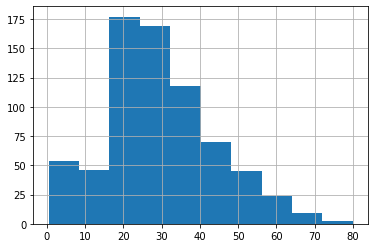

In [54]:
df.age.hist()

None

## Algunos Hallazgos Data set de ejemplo

* Shape del dataset
    + 891,12
* Variables categóricas, númericas y de texto
    + 10,2, 0
* Duplicados 
    + 107 en total
* Missing value
    + Age(177,20%), deck(688, 77%) y embark_town(2, >1%)
* Outliers
    + Age, Fare
    + Age y Fare en box-plot cruzado contra alive no muestra outliers claros
    + Parch y sibsp presentan algunos valores atípicos
* Asociación (siguiente sesión)
    + Age con class, deck con class, embark_town no tiene asociación clara con otra categórica
    + Alive with adult_male (0.24), age(0.23) y who(0.19) y cuanti con fare(0.26)
    + Asociación directa entre parch, alone, who, fare y sibsp
    + Asociación fare, class,deck y embark_town  
    + Asociación entre who, adult_male y sex
>**¿Qué hacer?**

## Missing values - Imputación


Existen diferentes tipos de valores perdidos y diferentes razones de su ausencia (no existe el dato, errores humanos, error tecnológico, la falta está asociada con algún tipo de datos, ...), lo que determina la estrategia para su tratamiento. 

### Clasificación:

Por su nivel de aleatoriedad, estadísticamente se consideran tres tipos:

+ Missing Completely at Random (MCAR). El hecho de que los datos falten es independiente de los datos observados y no observados.
+ Missing at Random (MAR). El hecho de que los datos faltan está sistemáticamente relacionado con los datos observados pero no con los no observados.
+ Missing Not at Random (MNAR). Significa que la probabilidad de tener un valor perdido varía por razones que por lo general desconocemos. La distribución de las observaciones perdidas puede depender de los valores observados y de los valores no observados, lo otros valores perdidos.

La clasificación del tipo de ausencia se reduce al análisis de patrones en los datos que faltan y a la experiencia y dominio del contexto y de los datos analizados. 

En los dos primeros casos, es menos difícil proponer métodos de imputación o inclusive ignorarlos, mientras que en el tercer caso, eliminar las observaciones con valores perdidos puede producir un sesgo en los análisis. Por lo tanto, hay que tener mucho cuidado antes de eliminar las observaciones. La imputación no siempre genera los mejores resultados.

A continuación una propuesta de taxonomía del trato que se le puede dar a valores ausentes:

><figure><center>
  <img src="https://www.researchgate.net/profile/Jaroslav-Bendl/publication/313510665/figure/fig12/AS:459933448708100@1486668087413/Summary-of-methods-for-handling-missing-values-in-data-instances-259.png" alt="MV" width=800 height=800/>
  <figcaption><a href="https://www.researchgate.net/figure/Summary-of-methods-for-handling-missing-values-in-data-instances-259_fig12_313510665)">Source</a></figcaption></figure></center> 
    
Otros espacios en donde se puede seguir estudiando este tema:


* [Dealing with Missing Data in Python](https://campus.datacamp.com/courses/dealing-with-missing-data-in-python/the-problem-with-missing-data?ex=1)
* [How to Handle Missing Data](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4)

## Tratamiento de outliers

<img src="https://maastrichtu-ids.github.io/images/2018-8-16-anol.png" alt="B1" width=300 height=300/><center><figcaption><a href="https://maastrichtu-ids.github.io/point-anomalies/">Source</a></figcaption></figure></center> 

En términos no formales un outlier se puede considerar un valor, un dato, una tupla inusual en comparación con el resto de datos. Estos datos atípicos pueden llegar a sesgar los análisis o los modelos para un experimento dado o un conjunto de datos definido. 

Pueden causar problemas con los algoritmos, introducir ruido a los datos, perder convergencia, aumentar el tiempo de procesamiento, entre otros aspectos.

<img src="https://miro.medium.com/max/1250/1*WnD2SK8I6-5EZoLi_XxFrg.png" alt="B1" width=800 height=800/><center><figcaption><a href="https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14">Source</a></figcaption></figure></center> 


#### Causas de aparición

Las causas de aparación son diversas, algunas se listan a continuación:

* Errores humanos. Errores de introducción de datos
* Errores instrumentales. Errores de medición
* Errores experimentales. Errores de extracción de datos o de planificación/ejecución de experimentos
* Intencionales. Valores atípicos ficticios realizados para probar los métodos de detección
* Errores de procesamiento de datos. Manipulación de datos involuntarias 
* Errores de muestreo. Extracción o mezcla de datos de fuentes erróneas 
* Naturales. No son un error, forman parte de la naturaleza de los datos


#### ¿Cómo tratar los outliers?


<table><tr>
<td> <img src="https://images-na.ssl-images-amazon.com/images/I/51ZCtYYhzCL._SX330_BO1,204,203,200_.jpg" alt="B1" width=100 height=100/> </td>
<td> <img src="https://images-na.ssl-images-amazon.com/images/I/41qsAVAtLgL._SY291_BO1,204,203,200_QL40_FMwebp_.jpg" alt="B2" width=95 height=95/> </td>
</tr></table>

En este notebook veremos algunos métodos sencillos de tratamiento (removerlos, establecer límites, imputarlos, ...); sin embargo, la decisión del tratamiento también está asociada con el tipo de problema a solucionar, con el tipo de modelo, la experticia y el conocimiento de los datos. 

El tratamiento de outliers es una linea de investigación. Ver por ejemplo el paper de [(Boukerche, Azzedine and Zheng, Lining and Alfandi, 2020)](https://dl.acm.org/doi/pdf/10.1145/3381028?casa_token=W1Y1_Vv5O-EAAAAA:ssmGjFOBBA589ko5Ahf1VYSk0odkZZUtvwSxy2pkVHS5nC7AWTQz1bxhu6-9Mbh9yCj0zI4oDBeFhVw) quienes proponen una toxonomia de los métodos existentes. Algunas alternativas para identificar y tratar outliers se pueden encontrar en [Novelty and Outlier Detection](https://scikit-learn.org/stable/modules/outlier_detection.html) en scikit-learn. 


## Ejemplo con dataset conocido (Titanic)

In [3]:
df.head()

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,adult_male,NaN,Southampton,non-alone
1,1,female,38.0,1,0,71.2833,First,woman,non-adult_male,C,Cherbourg,non-alone
2,1,female,26.0,0,0,7.9250,Third,woman,non-adult_male,NaN,Southampton,alone
3,1,female,35.0,1,0,53.1000,First,woman,non-adult_male,C,Southampton,non-alone
4,0,male,35.0,0,0,8.0500,Third,man,adult_male,NaN,Southampton,alone


Recordemos las variables:

+ sex: Sex
+ age: Age
+ sibsp: Number of siblings/spouses aboard
+ parch: Number of parents/children aboard
+ fare: Passenger fare (British pound)
+ adult_male: A male 18 or older (0 = No, 1=Yes)
+ deck: Deck of the ship
+ who: man (18+), woman (18+), child (<18)
+ **alive**: Yes, no (survived)
+ embarked_town: Port of embarkation ( Cherbourg, Queenstown, Southampton)(embarked)
+ class: Passenger class (1st; 2nd; 3rd) (pclass)
+ alone: 1= alone, 0= not alone ( you have at least 1 sibling, spouse, parent or child on board) (sibsp, parch)

Los hallazgos:

* Shape del dataset
    + 891,12
* Variables categóricas, númericas y de texto
    + 10,2, 0
* Duplicados 
    + 107 en total
* Missing value
    + Age(177,20%), deck(688, 77%) y embark_town(2, 1%)
* Outliers
    + Age, Fare
    + Age y Fare en box-plot cruzado contra alive no muestra outliers claros
    + Parch y sibsp presentan algunos valores atípicos
>**¿Qué hacer?**

## Estrategia con Dataset de ejemplo

### Tatamiento de missing value:

* age: 

    - No hacer nada. La mayoría de librerias omite los valores perdidos y calcula estadísticas sobre de los valores restantes. ( ej. df.describe()). 
    - Eliminar registros
    - Imputación simple media
    - Imputación simple mediana
    - Iterative (MICE: multivariate imputation by chained)
    - knn
    - Imputación a la medida con sex, class
    
* embarked:
    - Eliminar registros
    - Imputarlos con moda
* deck:
    - demasiados nan, no la tendremos en cuenta
    
### Tratamiento de outliers 

* Variables: Age, Fare, Parch y sibsp
    - IQR, Z, limitarlos, imputarlos (métodos univariados o multivariados) o no hacer nada. 
    - Recategorizar las variables con k-bins


## Transformación Dataset de ejemplo

### Imputación missing value de age

In [4]:
# Age
display(df[df.age.isnull()].head())

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
5,0,male,NaN,0,0,8.4583,Third,man,adult_male,NaN,Queenstown,alone
17,1,male,NaN,0,0,13.0000,Second,man,adult_male,NaN,Southampton,alone
19,1,female,NaN,0,0,7.2250,Third,woman,non-adult_male,NaN,Cherbourg,alone
26,0,male,NaN,0,0,7.2250,Third,man,adult_male,NaN,Cherbourg,alone
28,1,female,NaN,0,0,7.8792,Third,woman,non-adult_male,NaN,Queenstown,alone


In [5]:
df.isnull().sum()

alive            0
sex              0
age            177
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alone            0
dtype: int64

In [6]:
# Age
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
#df.dropna(subset=['age'])
im_mean=SimpleImputer(missing_values=np.nan, strategy='mean')
im_mean=im_mean.fit(df[['age']])
df['age_miu'] = im_mean.transform(df[['age']])

im_median=SimpleImputer(missing_values=np.nan, strategy='median')
im_median=im_median.fit(df[['age']])
df['age_med'] = im_median.transform(df[['age']])

iter_imputer = IterativeImputer(estimator=lr,missing_values=np.nan, 
                                max_iter=10,random_state=0)
#otros estimadores: BayesianRidge o ExtraTreeRegressor
iter_imputer= iter_imputer.fit(df[['age']])
df['age_mice']=iter_imputer.transform(df[['age']])

knn_imputer = KNNImputer(n_neighbors=4, weights="uniform")
knn_imputer  = knn_imputer.fit(df[['age']])
df['age_knn']=knn_imputer.transform(df[['age']])

###imputer ad-hoc
df['age_ah'] = df['age'].groupby([df['class'], df['sex']]).apply(lambda x: x.fillna(x.median()))
display(df[df.age.isnull()].head())

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone,age_miu,age_med,age_mice,age_knn,age_ah
5,0,male,NaN,0,0,8.4583,Third,man,adult_male,NaN,Queenstown,alone,29.699118,28.0,29.699118,29.699118,25.0
17,1,male,NaN,0,0,13.0000,Second,man,adult_male,NaN,Southampton,alone,29.699118,28.0,29.699118,29.699118,30.0
19,1,female,NaN,0,0,7.2250,Third,woman,non-adult_male,NaN,Cherbourg,alone,29.699118,28.0,29.699118,29.699118,21.5
26,0,male,NaN,0,0,7.2250,Third,man,adult_male,NaN,Cherbourg,alone,29.699118,28.0,29.699118,29.699118,25.0
28,1,female,NaN,0,0,7.8792,Third,woman,non-adult_male,NaN,Queenstown,alone,29.699118,28.0,29.699118,29.699118,21.5


In [8]:
df['age_ah'].isnull().sum()

0

In [9]:
#Podemos decidir extraer las variables similares
df= df.drop(columns=['age_knn', 'age_mice'], errors='ignore')

### Imputación missing value de  embark_town

In [57]:
df.embark_town.value_counts(normalize=True)

Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64

In [10]:
#embark_town
#df.dropna(subset=['embark_town'],how='any',inplace=True)# eliminar faltantes
imputer_mf = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer_mf= imputer_mf.fit(df[['embark_town']])

df['embark_town']=imputer_mf.transform(df[['embark_town']])
df['embark_town'].isnull().sum()

0

### Tratamiento de outliers: Age, Fare

In [11]:
#remover outliers al usar Z y IQR.
# imputar with IQR, z y percentiles

def remove_outlier_IQR(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    lower  = q1-1.5*iqr
    upper = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > lower) & (df_in[col_name] < upper)]
    return df_out

def remove_outlier_z(df_in,colname,standard_deviations):
    df_out =df_in[((df_in[colname] - df_in[colname].mean()) / df_in[colname].std()).abs() < standard_deviations]
    return df_out

def remove_outlier_perc(df_in, col_name, q):
    upper = df_in[col_name].quantile(1-q)
    lower = df_in[col_name].quantile(q)
    df_out = df_in.loc[(df_in[col_name] > lower) & (df_in[col_name] < upper)]
    return df_out

a=remove_outlier_IQR(df, 'age').shape
b=remove_outlier_z(df,'age',3).shape
c=remove_outlier_perc(df, 'age', 0.05).shape
print(a,b,c)


(703, 15) (712, 15) (635, 15)


In [12]:
# Outliers a nans
import pandas as pd
import numpy as np

def nan_outliers_IQR(s, replace=np.nan):
    Q1, Q3 = np.nanquantile(s, [0.25 ,0.75])
    IQR = Q3-Q1
    return s.mask(((s < (Q1 - 1.5 * IQR)) | (s > (Q3 + 1.5 * IQR)) & pd.notna(s)), replace)

df['age_onan']=nan_outliers_IQR(df['age'], replace=np.nan)
df['age_onan'].isnull().sum()

188

In [13]:
# imputer outliers nan con la mediana (ad-hoc) 
df['age_onan_ah'] = df['age_onan'].groupby([df['class'], df['sex']]).apply(lambda x: x.fillna(x.median()))
df['age_onan_ah'].isnull().sum()

0

In [14]:
# Limitamos la variable a sus percentiles q y (1-q) y luego imputamos nans con la mediana por sex y class (uso de .clip)
#Winsorizing
def lim_quantile_outliers(df, col_name, q):
    p_lower = df[col_name].quantile(q) # 5th quantile
    p_upper = df[col_name].quantile(1-q) # 95th quantile
    return df[col_name].clip(p_lower, p_upper, inplace=False)

df['age_lo_q05']=lim_quantile_outliers(df, 'age', 0.05)
df['fare_lo_q05']=lim_quantile_outliers(df, 'fare', 0.05)
df['age_lo_q05'].isnull().sum()

177

In [15]:
# imputer nan con la mediana (ad-hoc) 
df['age_lo_q05_ah_onan'] = df['age_lo_q05'].groupby([df['class'], df['sex']]).apply(lambda x: x.fillna(x.median()))
df['age_lo_q05_ah_onan'].isnull().sum()

0

In [16]:
# Categorizar, discretizar o Binning de Age, Fare
# Hay diversas formas de hacer binning. Usaremos la función qcut() que genera intervalos por quantiles.
import pandas as pd
df['age_qbin'] = pd.qcut(df['age_ah'], q=10, precision=0)
df['fare_qbin'] = pd.qcut(df['fare'], q=10, precision=2)
df.head()

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,deck,...,age_miu,age_med,age_ah,age_onan,age_onan_ah,age_lo_q05,fare_lo_q05,age_lo_q05_ah_onan,age_qbin,fare_qbin
0,0,male,22.0,1,0,7.2500,Third,man,adult_male,NaN,...,22.0,22.0,22.0,22.0,22.0,22.0,7.2500,22.0,"(20.0, 22.0]","(-0.01, 7.55]"
1,1,female,38.0,1,0,71.2833,First,woman,non-adult_male,C,...,38.0,38.0,38.0,38.0,38.0,38.0,71.2833,38.0,"(34.0, 40.0]","(39.69, 77.96]"
2,1,female,26.0,0,0,7.9250,Third,woman,non-adult_male,NaN,...,26.0,26.0,26.0,26.0,26.0,26.0,7.9250,26.0,"(25.0, 26.0]","(7.85, 8.05]"
3,1,female,35.0,1,0,53.1000,First,woman,non-adult_male,C,...,35.0,35.0,35.0,35.0,35.0,35.0,53.1000,35.0,"(34.0, 40.0]","(39.69, 77.96]"
4,0,male,35.0,0,0,8.0500,Third,man,adult_male,NaN,...,35.0,35.0,35.0,35.0,35.0,35.0,8.0500,35.0,"(34.0, 40.0]","(7.85, 8.05]"


In [17]:
#Eliminamos deck.
df=df.drop('deck', axis=1)
df.head()

,alive,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,...,age_miu,age_med,age_ah,age_onan,age_onan_ah,age_lo_q05,fare_lo_q05,age_lo_q05_ah_onan,age_qbin,fare_qbin
0,0,male,22.0,1,0,7.2500,Third,man,adult_male,Southampton,...,22.0,22.0,22.0,22.0,22.0,22.0,7.2500,22.0,"(20.0, 22.0]","(-0.01, 7.55]"
1,1,female,38.0,1,0,71.2833,First,woman,non-adult_male,Cherbourg,...,38.0,38.0,38.0,38.0,38.0,38.0,71.2833,38.0,"(34.0, 40.0]","(39.69, 77.96]"
2,1,female,26.0,0,0,7.9250,Third,woman,non-adult_male,Southampton,...,26.0,26.0,26.0,26.0,26.0,26.0,7.9250,26.0,"(25.0, 26.0]","(7.85, 8.05]"
3,1,female,35.0,1,0,53.1000,First,woman,non-adult_male,Southampton,...,35.0,35.0,35.0,35.0,35.0,35.0,53.1000,35.0,"(34.0, 40.0]","(39.69, 77.96]"
4,0,male,35.0,0,0,8.0500,Third,man,adult_male,Southampton,...,35.0,35.0,35.0,35.0,35.0,35.0,8.0500,35.0,"(34.0, 40.0]","(7.85, 8.05]"
